# Data Exploration

In [45]:
# iPython settings
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
# IMPORT necessary libraries
from __future__ import print_function, division, unicode_literals
import numpy as np
import os

from data import id2label, label2id, pickle2obj
from viz import mpl_show_img, sample_images_from_each_class
from viz import plot_label_frequencies, plot_density_distribution

Assuming the pickled data is in the same directory, and named `data.pickle` 
then we can load the data as follows: 

In [2]:
pickle_file = "data.pickle"
data = pickle2obj(pickle_file)

We can create a validation split:

In [3]:
n_valid = 1000          # Number of samples to set aside for validation set

# Create Validation data (from first `n_valid` samples of training set)
data["X_valid"] = data["X_train"][:n_valid]
data["Y_valid"] = data["Y_train"][:n_valid]
data["X_train"] = data["X_train"][n_valid:]
data["Y_train"] = data["Y_train"][n_valid:]

The Dimensions of the data are as follows: 

In [6]:
# Information about data shapes
print("DATA SHAPES")
print("- X_train: ", data["X_train"].shape)
print("- X_valid: ", data["X_valid"].shape)
print("- X_test : ", data["X_test"].shape)
print("- Y_train: ", data["Y_train"].shape)
print("- Y_valid: ", data["Y_valid"].shape)

DATA SHAPES
- X_train:  (2215, 32, 32, 3)
- X_valid:  (1000, 32, 32, 3)
- X_test :  (1732, 32, 32, 3)
- Y_train:  (2215,)
- Y_valid:  (1000,)


The number of classes to classify:

In [7]:
n_classes = len(id2label)
print("Number of classes = ", n_classes) # 25

Number of classes =  25


## Visualise the Images
The images below show the images in a grid. There are 25 rows, one for each 
class label, and 10 columns (for the number of images sampled from that category)

In [19]:
print("Labels: ")
print(id2label)

Labels: 
['beans', 'cake', 'candy', 'cereal', 'chips', 'chocolate', 'coffee', 'corn', 'fish', 'flour', 'honey', 'jam', 'juice', 'milk', 'nuts', 'oil', 'pasta', 'rice', 'soda', 'spices', 'sugar', 'tea', 'tomatosauce', 'vinegar', 'water']


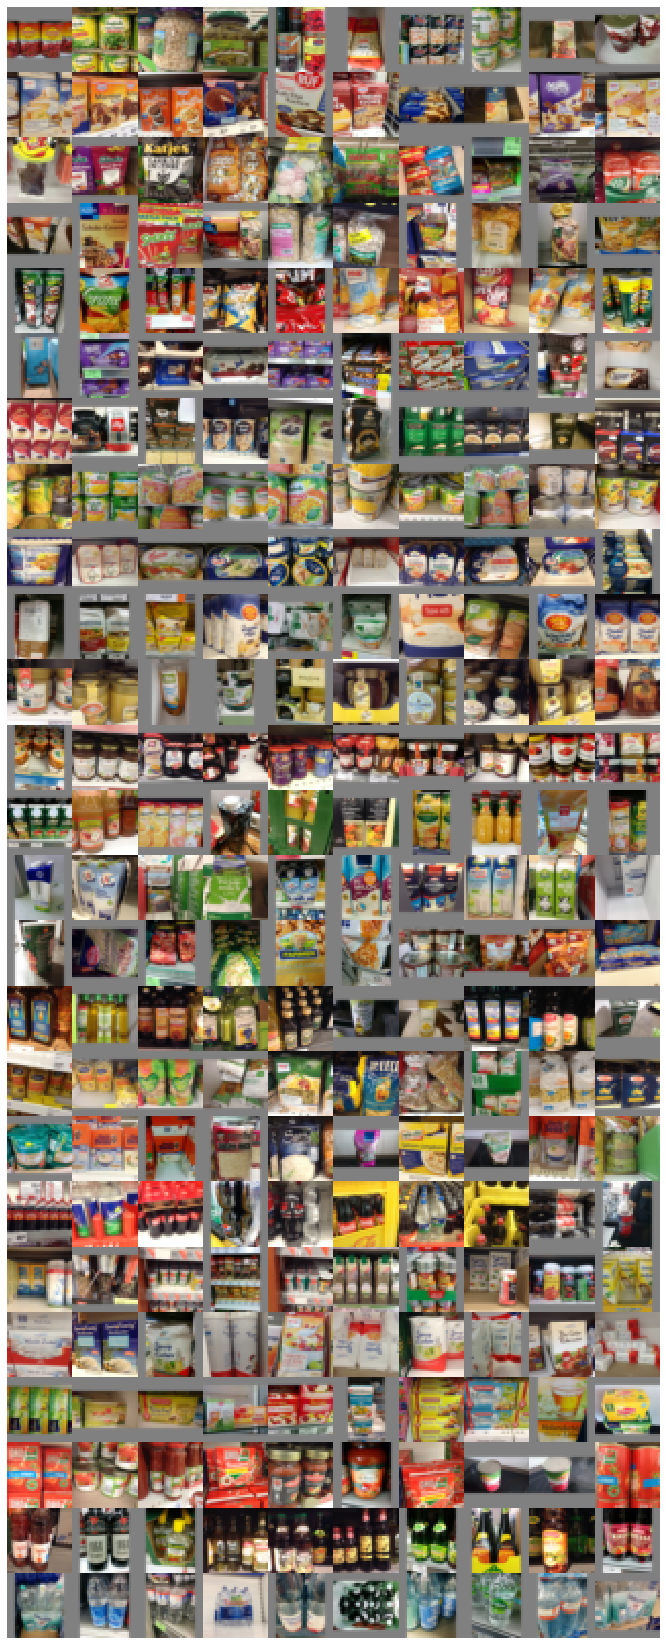

In [17]:
# Train data images
grid = sample_images_from_each_class(data["X_train"], data["Y_train"], num_per_class=10, seed=33)
mpl_show_img(grid, figsize=(20,30))

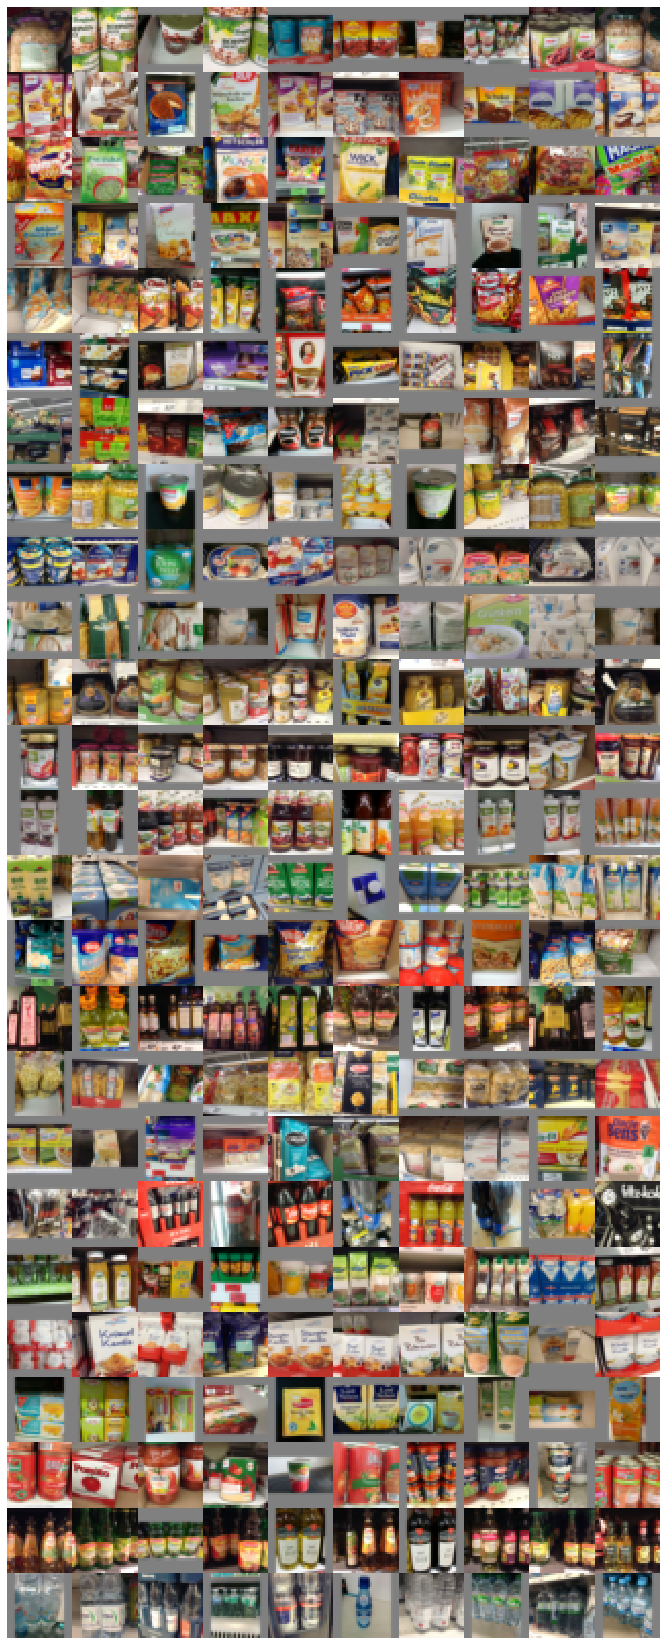

In [16]:
# Validation data images
grid = sample_images_from_each_class(data["X_valid"], data["Y_valid"], num_per_class=10, seed=33)
mpl_show_img(grid, figsize=(20,30))

## Visualising the distribution of the labels
To see whether there is any imbalance in the classes, we can draw a bargraph of the frequency of each class.

We can see that although the data is not perfectly balanced, most of the classes are within 2-3 times the size of each other. There is no class that is orders of magniture smaller or bigger than any other. So the slight imbalance probably wont affect our model too much. 

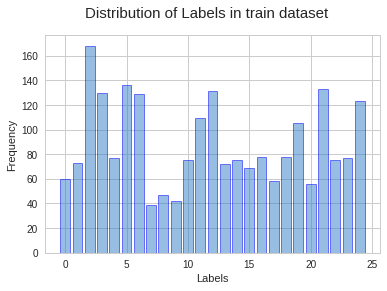

In [39]:
# Visualize distribution of labels
plot_label_frequencies(data["Y_train"], logscale=False, dataname="train")

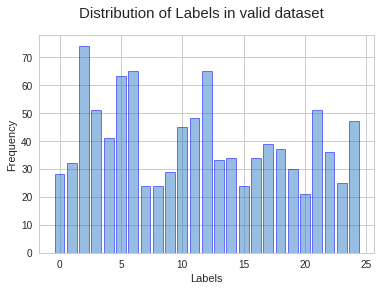

In [40]:
plot_label_frequencies(data["Y_valid"], logscale=False, dataname="valid")

## Visualizing the distribution of the pixel intensities

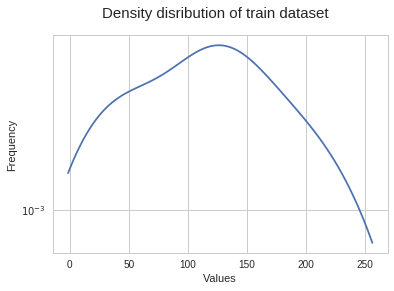

In [41]:
# Log scale density distribution of train data
plot_density_distribution(data["X_train"], logscale=True, dataname="train")

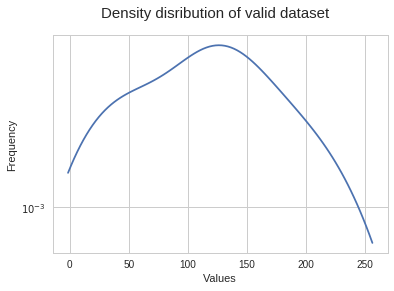

In [42]:
# Log scale density distribution of validation data
plot_density_distribution(data["X_valid"], logscale=True, dataname="valid")

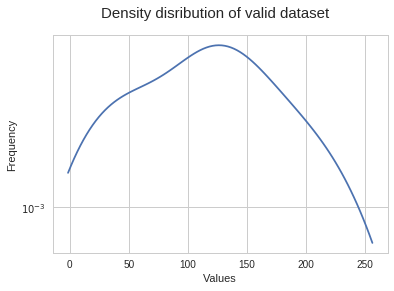

In [44]:
# Log scale density distribution of validation data
plot_density_distribution(data["X_valid"], logscale=True, dataname="valid")